# Llamaradas solares

In [104]:
# Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Entendimiento de los datos

In [105]:
column_names = ["Flare", "Date", "Start time", "Peak time", "End time", "Duration", "Peak counts", 
                "Total counts", "Energy", "X pos", "Y pos", "Radial", "Active region", 
                "Flag 1", "Flag 2", "Flag 3", "Flag 4", "Flag 5"]

df = pd.read_csv("hessi.solar.flare.UP_To_2018.csv",names=column_names, header = 0)

# Deal with datetime format
df['Start time'] = pd.to_datetime(df['Date'] + ' ' + df['Start time'])
df['Peak time'] = pd.to_datetime(df['Date'] + ' ' + df['Peak time'])
df['End time'] = pd.to_datetime(df['Date'] + ' ' + df['End time'])
df['Date'] = pd.to_datetime(df['Date'])
df.loc[df['Start time'] >= df['End time'], 'End time'] += pd.Timedelta(days=1)
df.loc[df['Start time'] >= df['Peak time'], 'Peak time'] += pd.Timedelta(days=1)
df.head()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,Y pos,Radial,Active region,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5
0,2021213,2002-02-12,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,712,136,167304.00,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,288,7,9504.00,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,216,15,11448.00,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,244,20,17400.00,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,236,336,313392.00,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [106]:
df.tail()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,Y pos,Radial,Active region,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5
116138,18020903,2018-02-09,2018-02-09 16:41:28,2018-02-09 16:42:54,2018-02-09 16:43:32,124,18,2888.00,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
116139,18020904,2018-02-09,2018-02-09 18:15:56,2018-02-09 18:17:26,2018-02-09 18:17:40,104,16,1656.00,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
116140,18021001,2018-02-10,2018-02-10 13:04:36,2018-02-10 13:06:46,2018-02-10 13:07:04,148,15,2224.00,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2
116141,18022601,2018-02-26,2018-02-26 15:49:56,2018-02-26 15:51:18,2018-02-26 15:53:52,236,16,3312.00,6-12,115,192,223,2700,A0,DF,P1,PE,Q2
116142,18030301,2018-03-03,2018-03-03 04:04:08,2018-03-03 04:06:22,2018-03-03 04:12:20,492,42,15816.00,6-12,926,128,935,2700,A0,P1,PE,Q1,NaN


Vemos que los datos comienzan a registrarse desde el año 2002 y terminan en el año 2018. Esto va de la mano con lo especificado por la duración de la misión RHESSI. Vemos que en las columnas de `Flag n` hay muchos datos faltantes. Es como si a cada registro se le asignaran algunas `Flags` y se guardan ahí como una lista sin un orden específico. 

In [107]:
df.isnull().sum()

Flare                0
Date                 0
Start time           0
Peak time            0
End time             0
Duration             0
Peak counts          0
Total counts         0
Energy               0
X pos                0
Y pos                0
Radial               0
Active region        0
Flag 1               0
Flag 2               0
Flag 3           19907
Flag 4           20202
Flag 5           61180
dtype: int64

Notamos que los únicos valores faltantes están en las columnas `Flag 3`, `Flag 4` y `Flag 5`. Así que a cada regsitro se le asigna de dos a cinco `Flags`

### Análisis de la columna objetivo: `Duration`

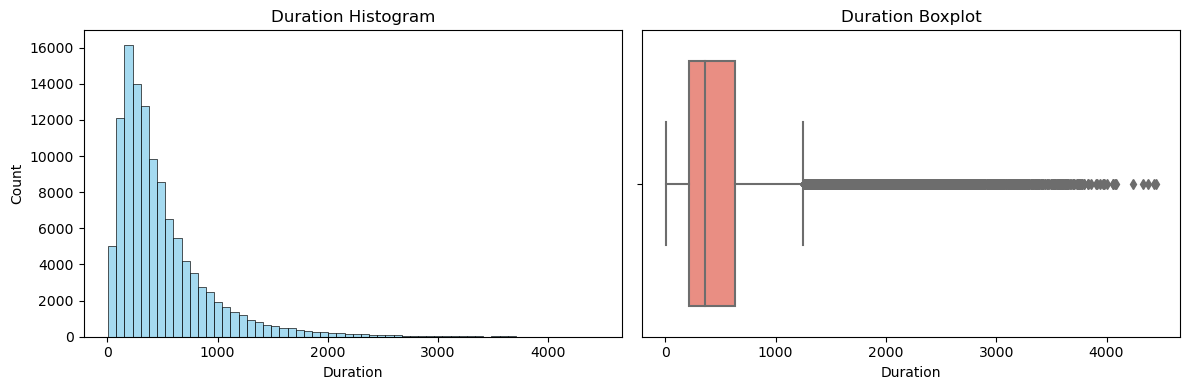

In [108]:
columns = ['Duration']

def plot_numerical(df, columns, flag):
    num_cols = 2 + flag
    num_rows = len(columns)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(data=df, x=col, ax=axes[i*num_cols], bins=60, color='skyblue')
        axes[i*num_cols].set_title(f'{col} Histogram')

        sns.boxplot(data=df, x=col, ax=axes[i*num_cols+1], color = "salmon")
        axes[i*num_cols+1].set_title(f'{col} Boxplot')
        
        if flag:
            sns.scatterplot(data=df, x='Duration', y=col, ax = axes[i*num_cols + 2], color="skyblue", s  = 3)
            axes[i*num_cols+2].set_title(f'Duration vs. {col}')
            
    for j in range(num_rows * num_cols, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    
plot_numerical(df, columns, False)

El histograma de duration es fácil de comprender. La mayoría de llamaradas solares tienen una duración de aproximadamente 300 segundos, con muchas erupciones durando muchísimo más tiempo. Se nota que la distribución no es normal, si no que se parece a una chi-cuadrado o similar.

### Análisis de datos tipo fecha

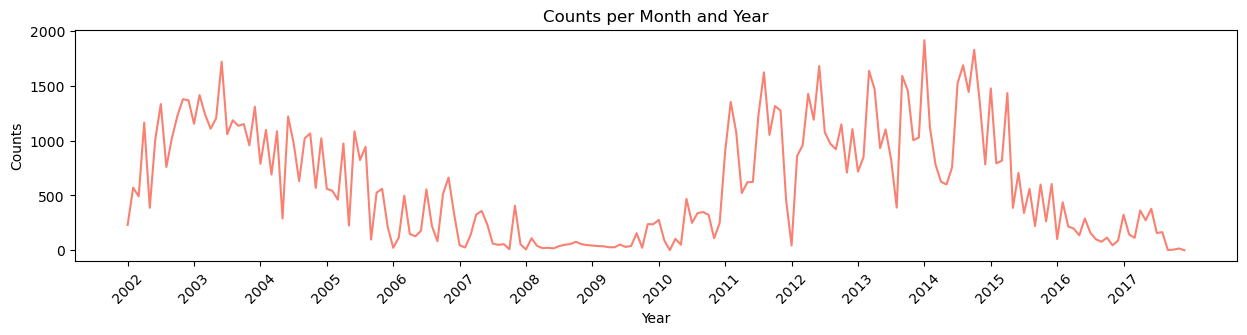

In [109]:
df['Year'] = df['Date'].dt.year
df["Month"] = df['Date'].dt.month
counts_per_month_year = df.groupby(['Year', 'Month']).size()

plt.figure(figsize=(15, 3))
ax = counts_per_month_year.plot(color='salmon')  # Change the color to salmon
plt.title('Counts per Month and Year')
plt.xlabel('Year')
plt.ylabel('Counts')

# Modify x-axis ticks and labels
ticks = range(0, len(counts_per_month_year), 12)  # Adjust the step as needed
labels = [f"{year}" for year, month in counts_per_month_year.index]
ax.set_xticks(ticks)
ax.set_xticklabels([labels[i] for i in ticks], rotation=45)

plt.show()

En esta gráfica que muestra las llamaradas solares por mes, podemos observar el ciclo solar. Según datos externos, sabemos que el ciclo solar tiene una duración aproximada de 11 años, y aquí en esta gráfica podemos notar que la cantidad de erupciones solares sigue este ciclo y oscila a lo largo de los años. Si notamos la duración de las llamaradas en cada uno de los años del ciclo solar podremos ver un patrón. Tomaremos como inicio del ciclo solar el año 2008. 

In [110]:
# Calculate the solar cycle based on the year starting from 2008
df['Solar_cycle'] = ((df['Date'].dt.year - 2008) % 11) + 1

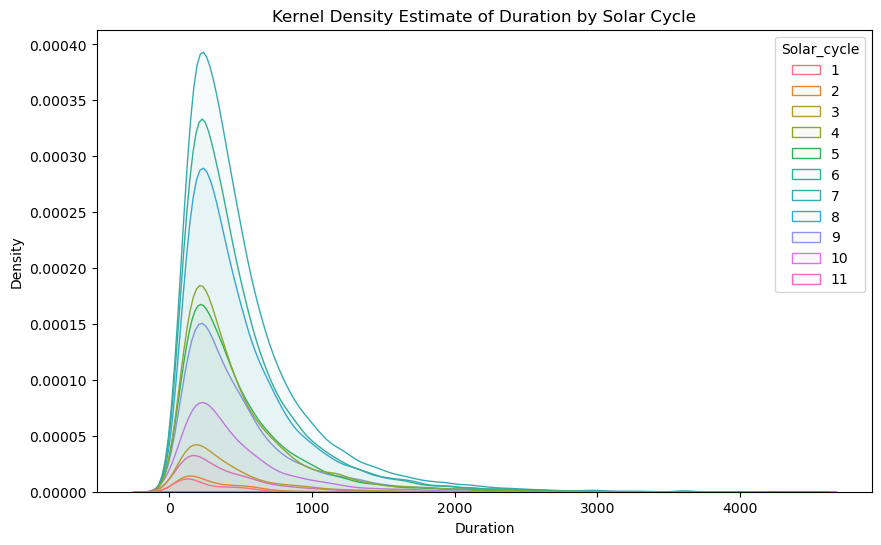

In [111]:
base_color = '#FF5733'
num_colors = 11
cyclic_palette = sns.color_palette("husl", num_colors)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Duration', hue='Solar_cycle', fill =True, palette=cyclic_palette, alpha = 0.04)
plt.title('Kernel Density Estimate of Duration by Solar Cycle')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()

Vemos que en la mitad del ciclo (5-9) la cantidad de llamaradas solares es mucho mayor que a los extremos del ciclo. También es aparente que la varianza de estas llamaradas es mayor en la mitad del ciclo que a los extremos, aunque tengan un promedio similar.

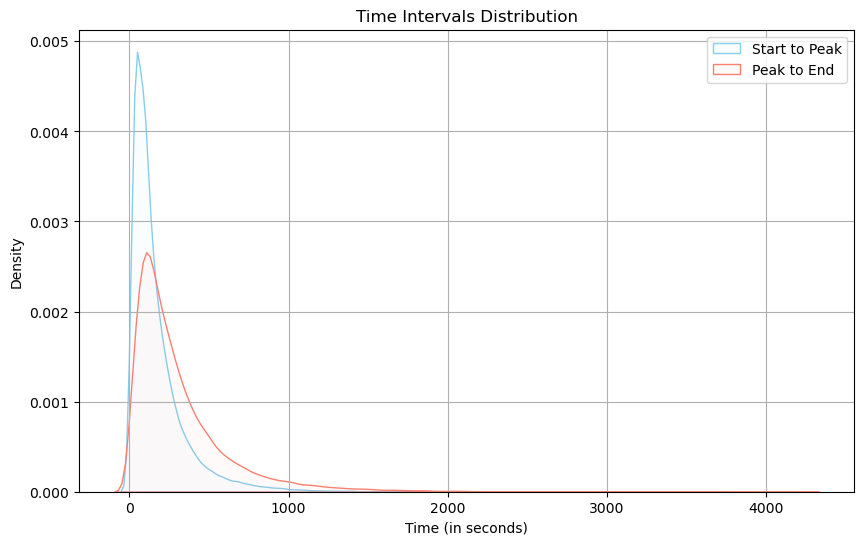

In [112]:
# Calculate difefrence between start - peak - end times
start_peak = (df["Peak time"] - df["Start time"]).dt.total_seconds()
peak_end = (df["End time"] - df["Peak time"]).dt.total_seconds()

plt.figure(figsize=(10, 6))
sns.kdeplot(start_peak, label='Start to Peak', color='skyblue', fill =True, alpha = 0.04)
sns.kdeplot(peak_end, label='Peak to End', color='salmon', fill =True, alpha = 0.04)

plt.title('Time Intervals Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver que el tiempo que una llamarada tarda en llegar a su pico es mayor que la que necesita para terminar. Esto se confirma con la idea de que una vez que una erupción libera una gran energía en su pico, se termina muy rápido, ya que no tiene energía para sostenerse.

### Análisis de datos categóricos

Ya que los datos en la categoría `Flags` son tratados como una lista, convertiremos cada posible `flag` para analizarla independientemente

In [159]:
split_values = df['Flag 5'].str.split()
split_values = df['Flag 5'].str.split(expand=True)
split_values = df['Flag 5'].str.split(' ', expand=True).add_prefix('FlagN ')
df = pd.concat([df, split_values], axis = 1)
flags = df.filter(like = "Flag")
flags = flags.drop("Flag 5", axis = 1)
flag_dummies = pd.get_dummies(flags, prefix="Flag")
flags = flag_dummies.groupby(flag_dummies.columns.str[-2:], axis=1).sum().astype(bool)
flags["A"] = flags.apply(lambda x: "A0" if x["A0"] == 1 else ("A1" if x["A1"] == 1 else "A3"), axis=1)
flags["Q"] = flags.apply(lambda x: "Q1" if x["Q1"] == 1 else ("Q2" if x["Q2"] == 1 else ("Q3" if x["Q3"] == 1 else ("Q4" if x["Q4"] == 1 else "Q5"))), axis=1)
flags.drop(columns=["A1", "A0", "A3","Q1", "Q2", "Q3", "Q4", "Q5"], inplace=True)
df = pd.concat([df, flags], axis=1)
df = df.filter(regex="^(?!.*Flag)")
df.head()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,...,Q7,SD,SE,SS,a0,a1,a2,a3,A,Q
0,2021213,2002-02-12,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,712,136,167304.00,12-25,592,...,False,False,False,False,False,False,False,False,A1,Q5
1,2021228,2002-02-12,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,288,7,9504.00,6-12,604,...,False,False,False,False,False,False,False,False,A1,Q1
2,2021332,2002-02-13,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,216,15,11448.00,6-12,-310,...,False,False,False,False,False,False,False,False,A1,Q5
3,2021308,2002-02-13,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,244,20,17400.00,12-25,-277,...,False,False,False,False,False,False,False,False,A1,Q5
4,2021310,2002-02-13,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,236,336,313392.00,25-50,-272,...,False,False,False,False,False,False,False,False,A1,Q2


In [161]:
df.describe(include = "bool")

,DF,DR,EE,ES,GD,GE,GS,NS,P1,PE,PS,Q6,Q7,SD,SE,SS,a0,a1,a2,a3
count,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143,116143
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
freq,75552,71861,113266,112562,115849,111552,111653,115407,109342,65110,110109,116129,116142,115998,114574,116063,110954,114122,116141,116011


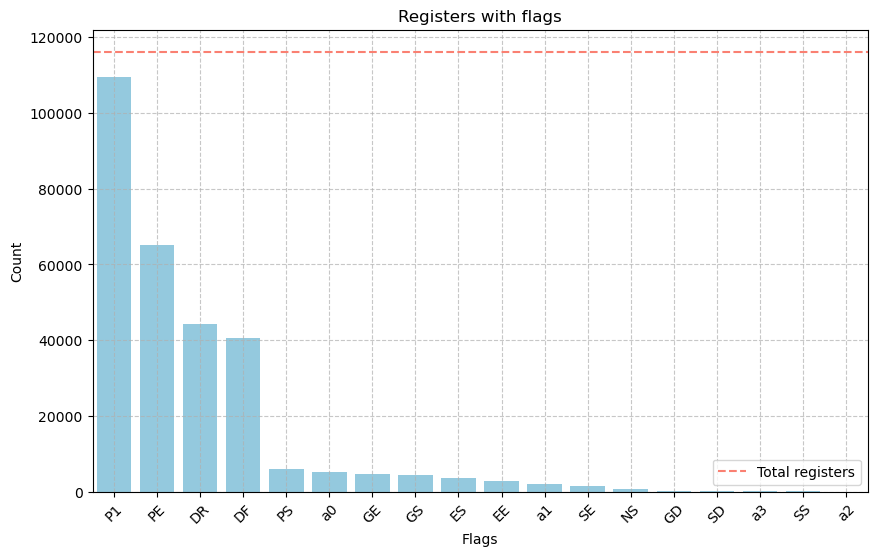

In [162]:
quality_columns = ['DF', 'DR', 'EE', 'ES', 'GD', 'GE', 'GS', 'NS', 'P1',
                   'PE', 'PS', 'SD', 'SE', 'SS', 'a0', 'a1', 'a2', 'a3']

plt.figure(figsize=(10, 6))
count_df = df[quality_columns]
quality_count_df = count_df.sum().sort_values(ascending=False)
sns.barplot(x=quality_count_df.index, y=quality_count_df, color='skyblue')
plt.axhline(y=116143, color='Salmon', linestyle='--', label='Total registers')
plt.title('Registers with flags')
plt.xlabel('Flags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

- Según el diccionario de datos, P1 indica una posición válida de los sensores. No hay datos disponibles para P0, que representaría una posición inválida, pero es posible que aquellos no marcados con P1 carezcan de una posición válida.
- Se registraron muchos datos como PE, lo que indica la presencia de partículas al momento de la medición. Esto sugiere que en estos casos, el Sol no solo emitió radiación, sino también materia.
- En algunos registros, se observa que los valores de DR y DF son altos. Esto podría significar que en algún momento durante la medición, una parte del instrumento sufrió decimación, lo que resultaría en una menor calidad del registro.
- Además de PE, algunos pocos datos presentan otras categorías, como PS, que señala un posible destello solar (aunque no confirmado), y GE, GD y GS, indicando una brecha en la transmisión de datos. También están ES y EE, que indican que el instrumento perdió de vista al Sol debido a que la Tierra lo tapaba, entre otros. Para nuestro modelo, sería prudente no utilizar estos datos, ya que hay pruebas físicas que indican que no tienen la calidad suficiente.

In [163]:
df.describe(include='object')

,Energy,A,Q
count,116143,116143,116143
unique,9,3,5
top,6-12,A0,Q1
freq,86959,107773,42348


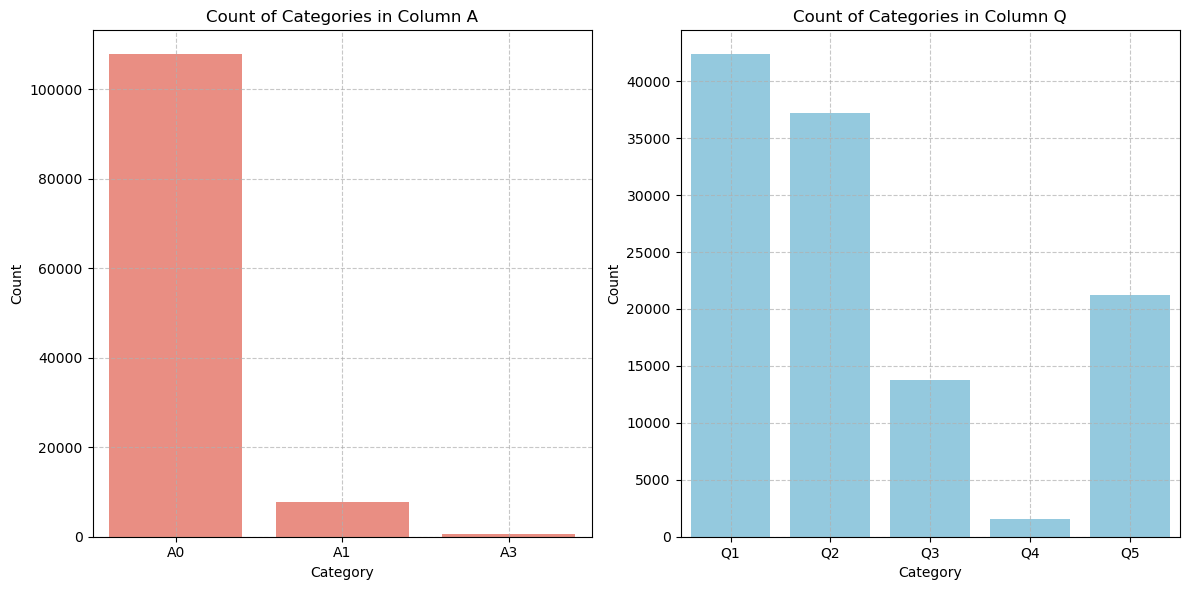

In [164]:
order_A = ['A0', 'A1', 'A3']
order_Q = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

# Plotting with seaborn
plt.figure(figsize=(12, 6))

# Plot for column "A"
plt.subplot(1, 2, 1)
sns.countplot(x=df['A'], order=order_A, color='salmon')
plt.title('Count of Categories in Column A')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for column "Q"
plt.subplot(1, 2, 2)
sns.countplot(x=df['Q'], order=order_Q, color='skyblue')
plt.title('Count of Categories in Column Q')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- La columna A denota el estado del atenuador en el pico del destello. Se nota que en la mayoría de los casos su estado es normal (A0) pero en algunos está en un estado grueso (A1) y en otros esta en estado grueso y delgado (A3).
- La columna Q denota la calidad general del registro. En este caso Q1 es la calidad más alta y Q11 la calidad más baja. Vemos que ningún dato pasa de calidad Q5 por lo que los datos tendrían buena calidad en este caso.

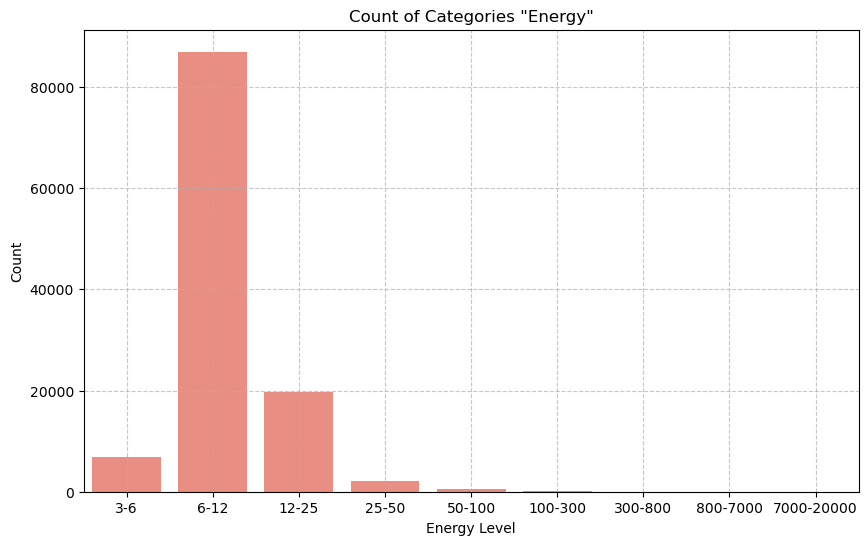

In [165]:
order = ["3-6", "6-12", "12-25", "25-50", "50-100", "100-300", "300-800", "800-7000", "7000-20000"]
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Energy'], color='salmon', order = order)
plt.title('Count of Categories "Energy"')
plt.xlabel('Energy Level')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

Vemos que la mayoría de datos están en un rango de 6-12 KeV, con muy pocos datos en las otras categorías. Esto concuerda con lo que se detecta. Es muy extraño que haya muchas llamaradas solares de alta energía y también es difícil de detectar llamaradas de baja energía.

### Análisis datos numéricos

In [142]:
df.describe(include = ["int", "float"])

,Flare,Duration,Peak counts,Total counts,X pos,Y pos,Radial,Active region
count,116143.00,116143.00,116143.00,116143.00,116143.00,116143.00,116143.00,116143.00
mean,10995631.19,493.64,215.09,376884.26,-7.68,-42.19,687.90,990.07
std,9888160.82,434.13,839.38,3048797.06,755.77,401.90,511.36,1351.85
min,2021213.00,8.00,0.00,8.00,-10012.00,-10005.00,0.00,0.00
25%,4112632.50,212.00,28.00,22840.00,-701.00,-247.00,467.00,0.00
50%,11122972.00,364.00,56.00,58560.00,0.00,-71.00,759.00,691.00
75%,14042224.50,628.00,144.00,179808.00,708.00,198.00,946.00,1564.00
max,171115109.00,4444.00,113156.00,435550080.00,1190.00,1223.00,14154.00,9999.00


Vemos que no hay datos faltantes en la categoría de numéricos. La duración promedio de una llamarada es de 493.64 segundos u 8.2 min. Duran entre 8 segundos a una hora y 15 minutos, por lo que son sucesos cortos de actividad solar. La cantidad total de picos de radiación o `Peak counts` que recibe cada instrumento por segundo va desde 0 hasta 113,156, por lo que hay mucha variabilidad. En `Total counts` la situación es parecida. Veamos la distribución de estos datos.

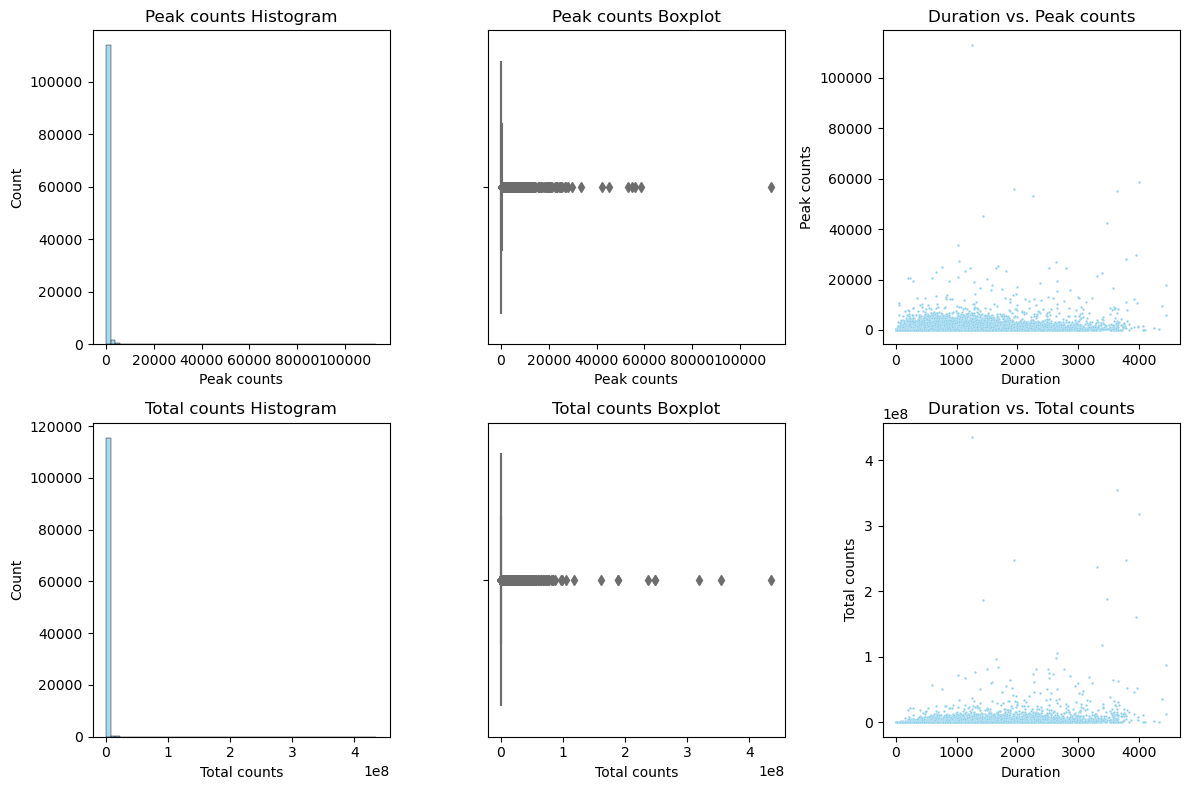

In [61]:
columns = ['Peak counts', 'Total counts']
plot_numerical(df, columns, True)

Vemos que para `Peak counts` y  `Total counts` hay outliers absurdamente grandes, tanto que afectan de sobremanera la distribución de los datos en estas columnas. Si viésemos su distribución limitando sus valores, podríamos ver mejor su distribución.

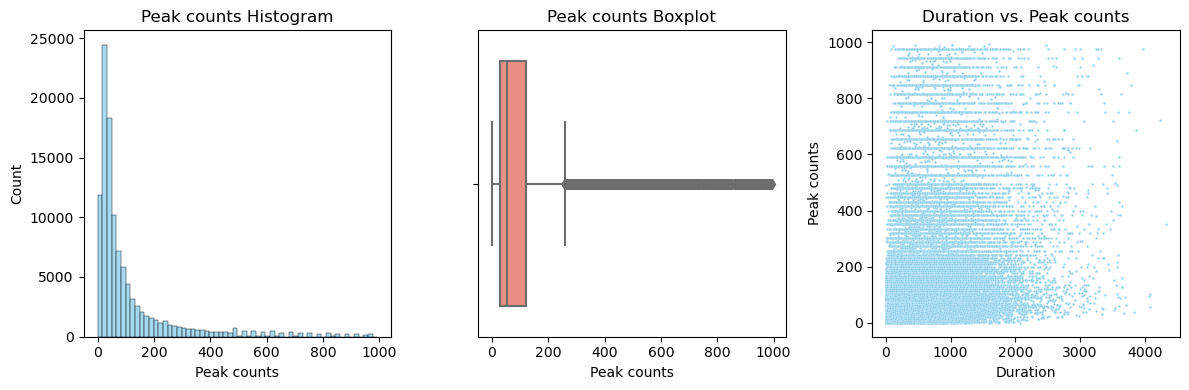

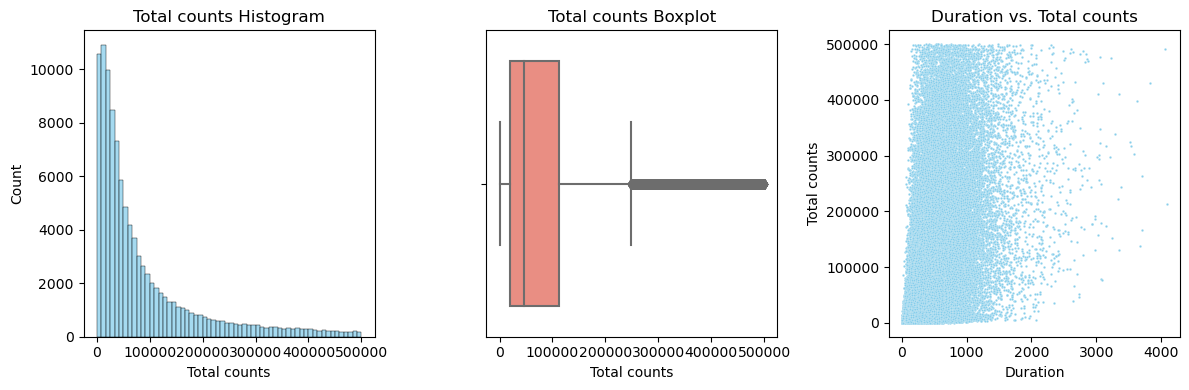

In [62]:
lim_peak_counts = df[df["Peak counts"]<= 1000]
lim_total_counts = df[df["Total counts"]<= 500000]
plot_numerical(lim_peak_counts, ["Peak counts"], True)
plot_numerical(lim_total_counts, ["Total counts"], True)

Ahora si podemos observar a profundidad las distribuciones de estas columnas. Nótese que no son distribuciones normales. En las dos, hay una candidad alta de valores comunes, para `Peak counts` la mayoría de registros están alrededor de 50 y para `Total counts` están en 50000. Sin embargo para las dos columnas hay muchos datos muy grandes, que clasificarían como outliers.

Reusable code

In [127]:
df['Calculated Duration'] = (df['End time'] - df['Start time']).dt.total_seconds()
df['Duration Matches'] = df['Duration'] == df['Calculated Duration']
df['Duration Matches'].unique()

array([ True])